### CMPE 256 Assignment 9 -  Feature Engineering Unstructured Data (Audio & Wave Files) ###

#### Adding Data and Imports ###

In [22]:
import sklearn
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd

#### Functions to Process the Files ####

In [24]:
def load_audio_file(file_path):
    ipd.Audio(file_path)
    x , sr = librosa.load(file_path)
    print(type(x), type(sr))
    print(x.shape, sr)
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    return x, sr

In [25]:
def spectrogram(x):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 10))

    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [26]:
def normalize(x, axis=0):
        return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [27]:
def spectralCentroid(x, sr):
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    plt.figure(figsize=(14, 10))
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='b')
    return t

In [28]:
def spectralRollOff(x, sr, t):
    spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
    plt.figure(figsize=(14, 10))
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')

In [29]:
def spectralBandwidth(x, sr, t):
    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
    plt.figure(figsize=(15, 10))
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_bandwidth_2), color='r')
    plt.plot(t, normalize(spectral_bandwidth_3), color='g')
    plt.plot(t, normalize(spectral_bandwidth_4), color='y')
    plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [30]:
def zeroCrossingRate(x, sr):
    #Plot the signal:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    # Zooming in
    n0 = 9000
    n1 = 9100
    plt.figure(figsize=(14, 5))
    plt.plot(x[n0:n1])
    plt.grid()

In [31]:
def mfcc(x, sr):
    mfccs = librosa.feature.mfcc(x, sr=sr)
    print(mfccs.shape)
    plt.figure(figsize=(15, 10))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [32]:
def processFile(file_path):
    print("Loading the audio file " + file.split("/")[1])
    x, sr = load_audio_file(file)
    print ("Spectrogram")
    spectrogram(x)
    print ("Spectral Centroid")
    t = spectralCentroid(x, sr)
    print("Spectral Roll Off")
    spectralRollOff(x, sr, t)
    print("Spectral Bandwidth")
    spectralBandwidth(x, sr, t)
    print("Zero Crossing Rate")
    zeroCrossingRate(x, sr)
    print("MFCC")
    mfcc(x, sr)

#### Processing the files ####

Loading the audio file 021.wav
<class 'numpy.ndarray'> <class 'int'>
(291600,) 22050
Spectrogram
Spectral Centroid


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/1754874564.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


Spectral Roll Off


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3094491030.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


Spectral Bandwidth


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:3: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:4: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

Zero Crossing Rate
MFCC
(20, 570)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/533505447.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


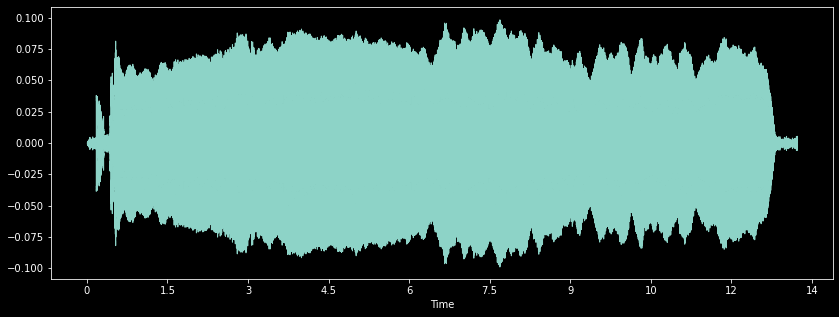

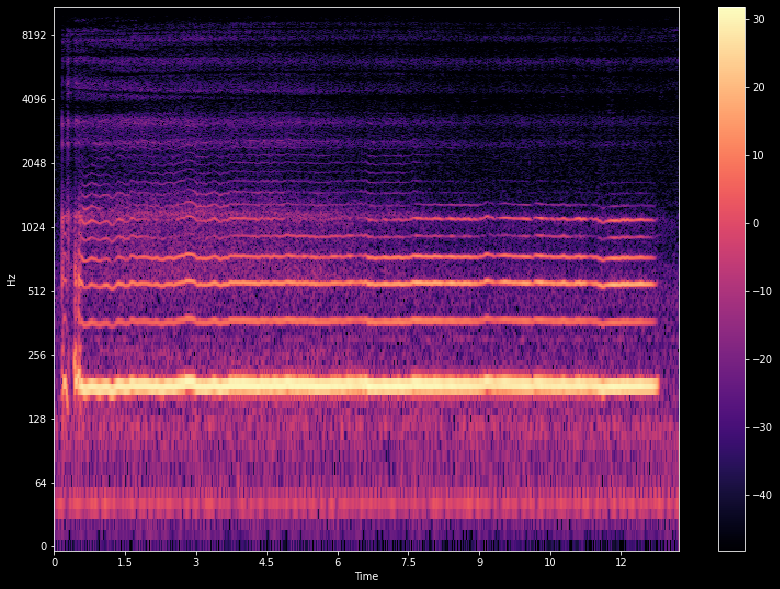

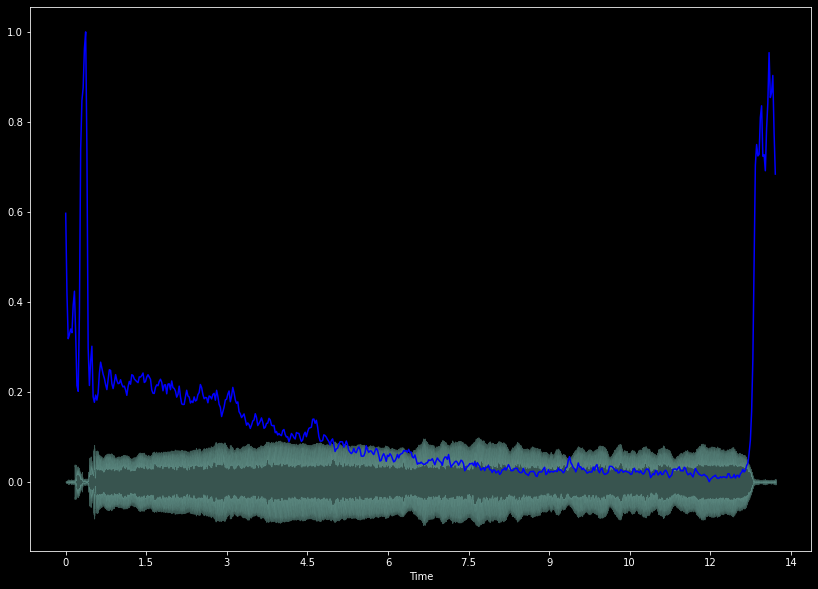

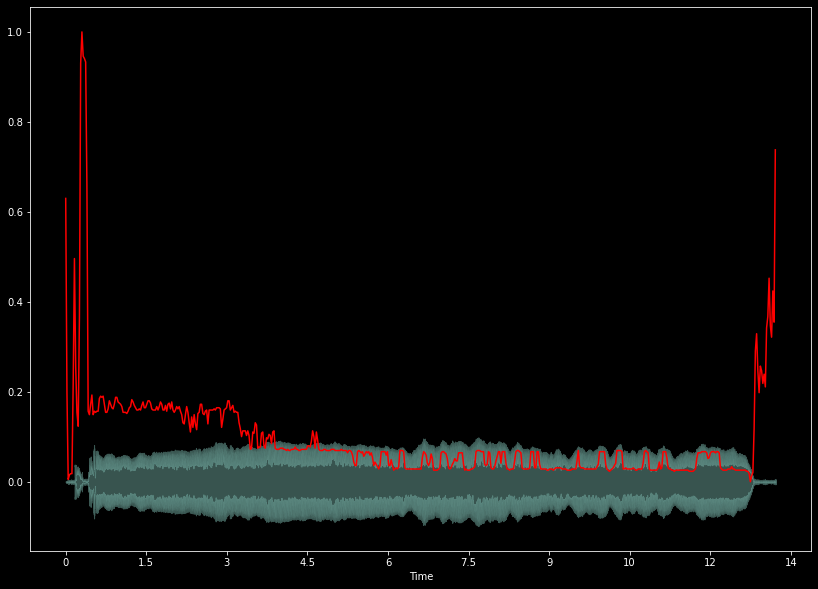

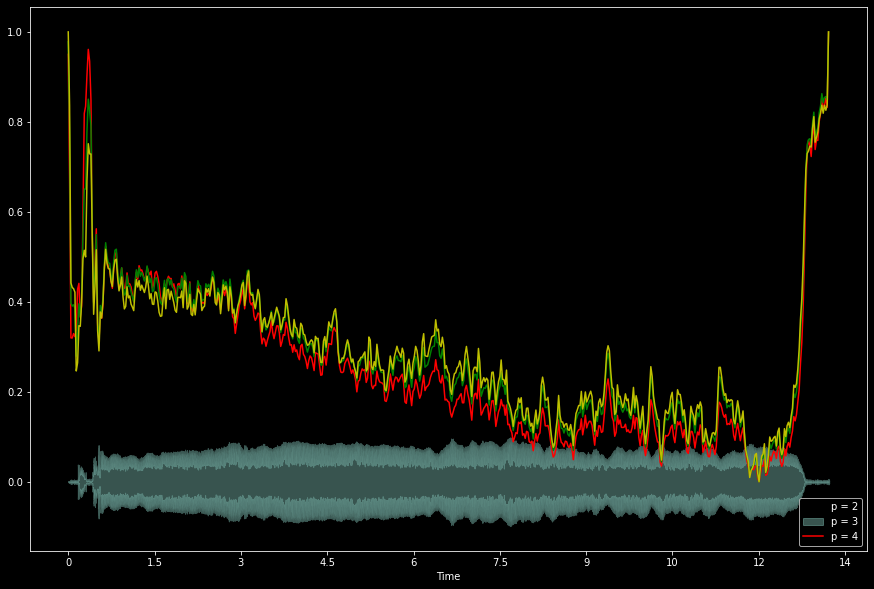

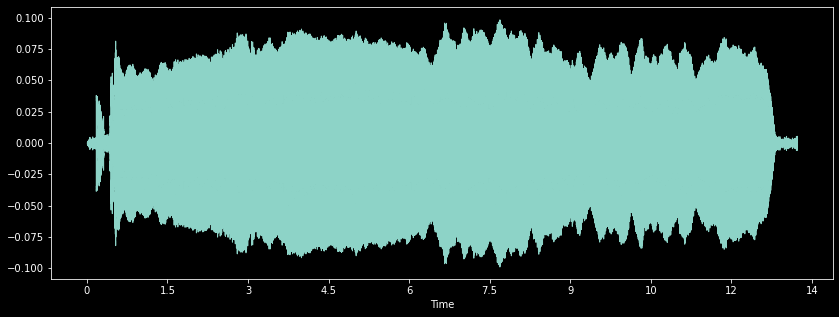

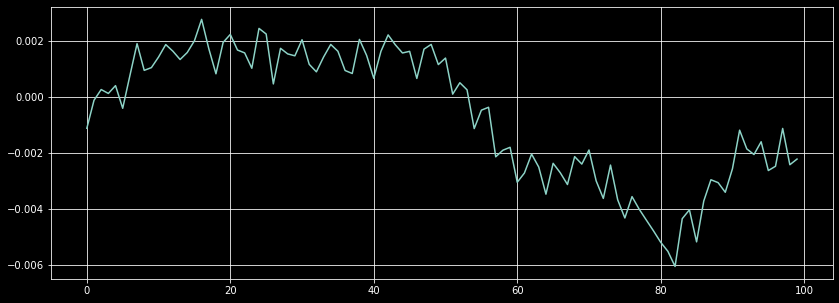

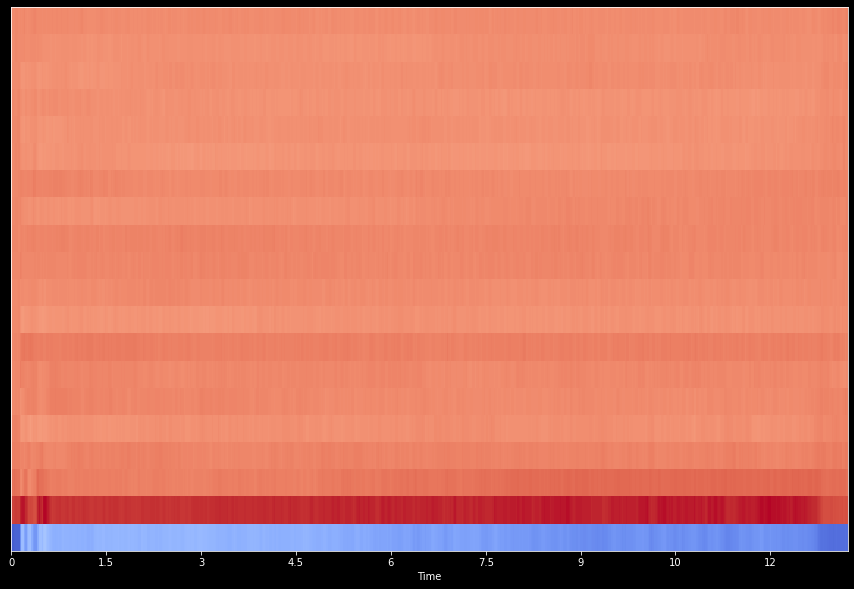

In [33]:
processFile("./002.wav")

Loading the audio file 021.wav
<class 'numpy.ndarray'> <class 'int'>
(291600,) 22050
Spectrogram
Spectral Centroid


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/1754874564.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


Spectral Roll Off


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3094491030.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


Spectral Bandwidth


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:3: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:4: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

Zero Crossing Rate
MFCC
(20, 570)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/533505447.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


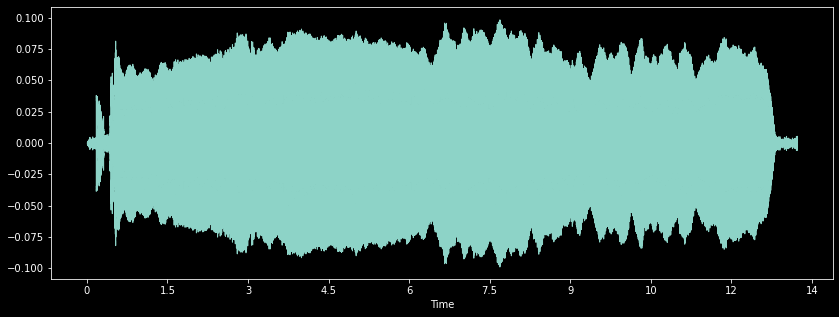

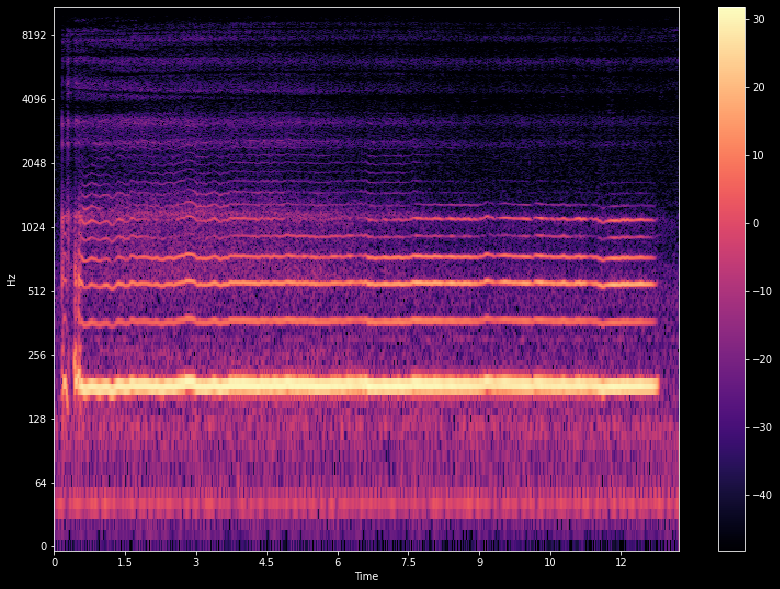

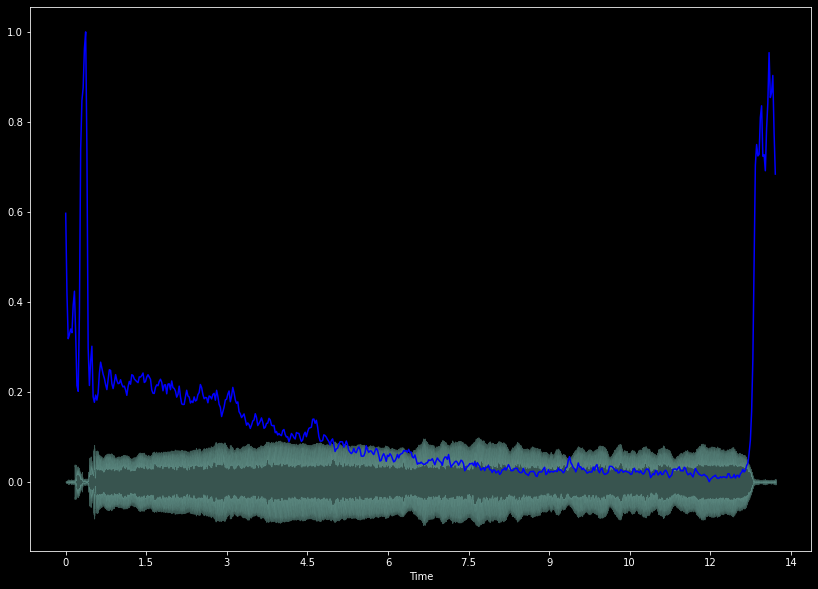

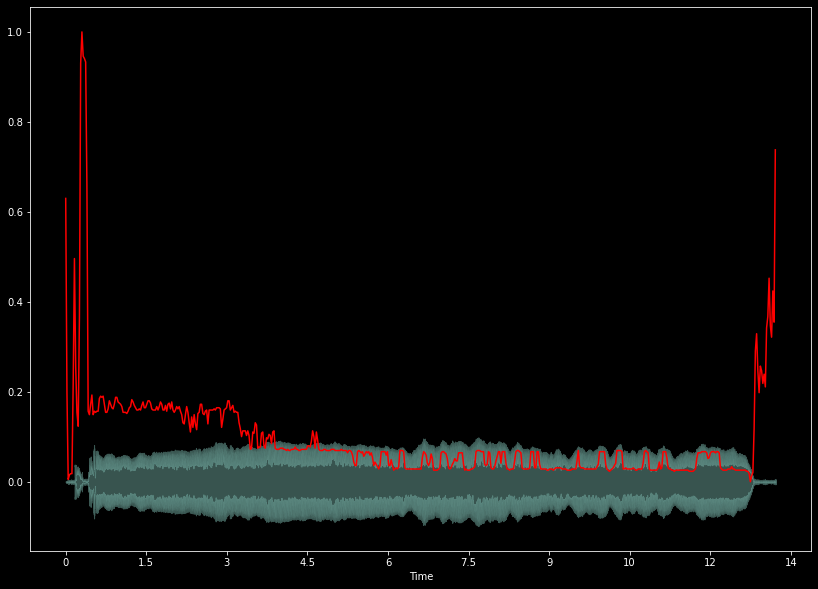

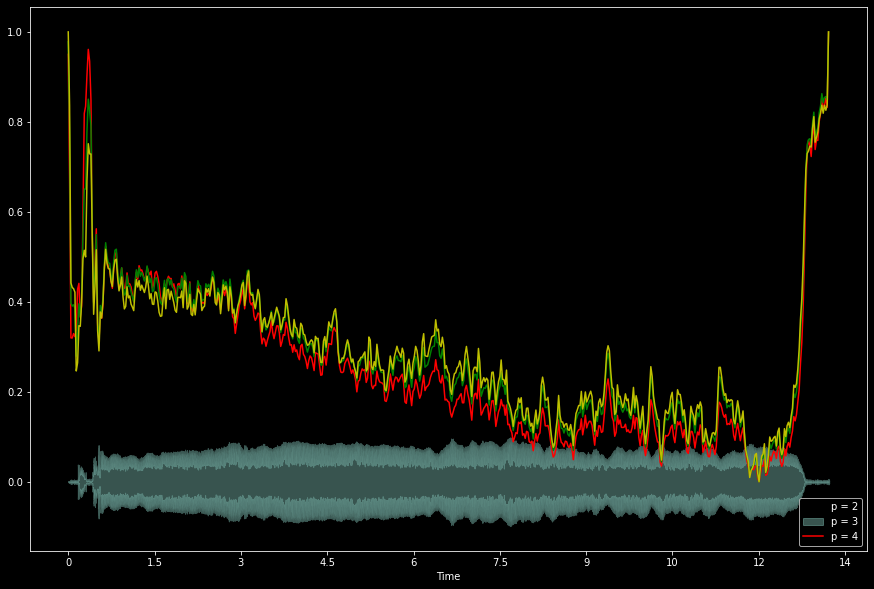

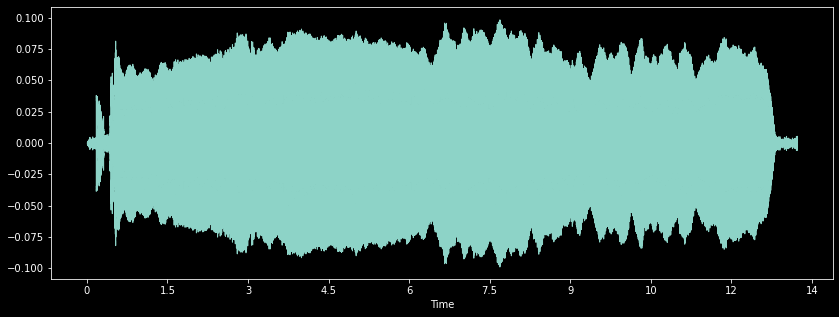

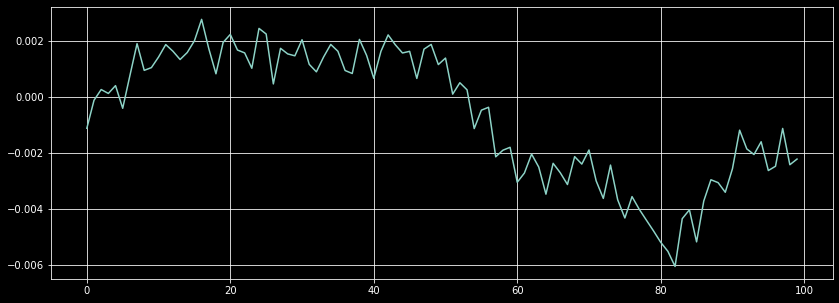

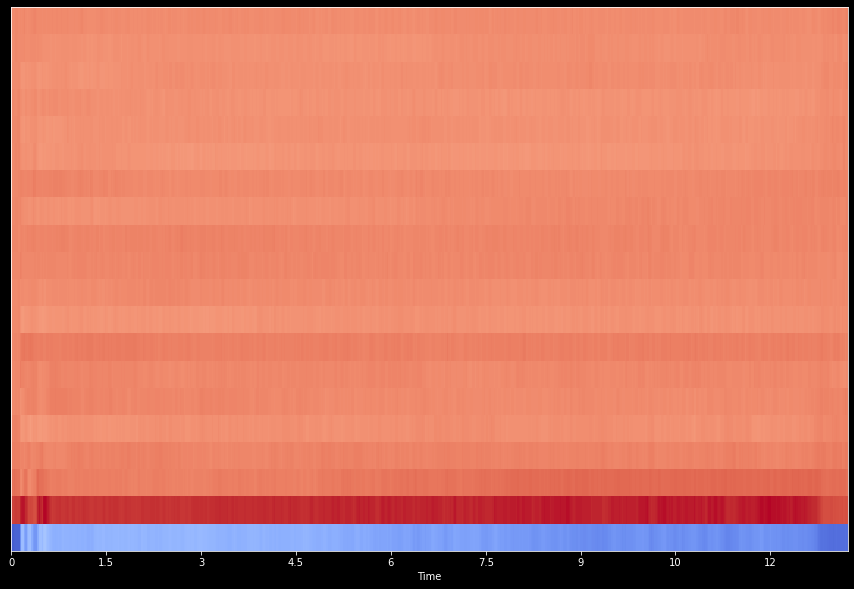

In [34]:
processFile("./004.wav")

Loading the audio file 021.wav
<class 'numpy.ndarray'> <class 'int'>
(291600,) 22050
Spectrogram
Spectral Centroid


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/1754874564.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


Spectral Roll Off


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3094491030.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


Spectral Bandwidth


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:3: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:4: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

Zero Crossing Rate
MFCC
(20, 570)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/533505447.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


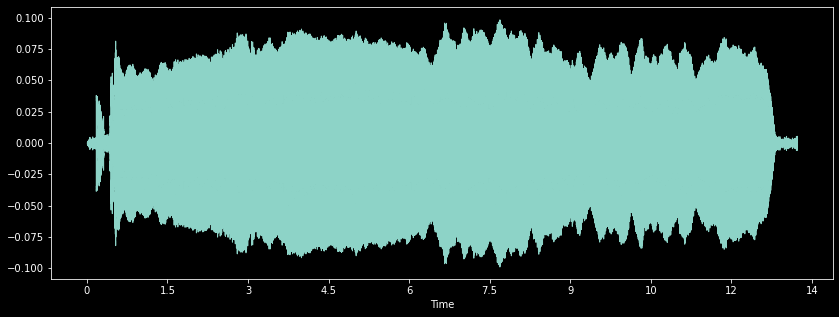

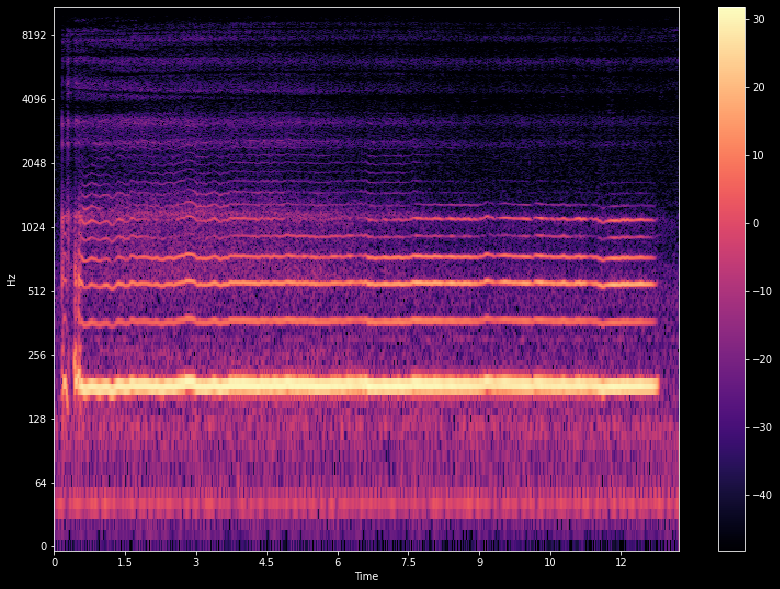

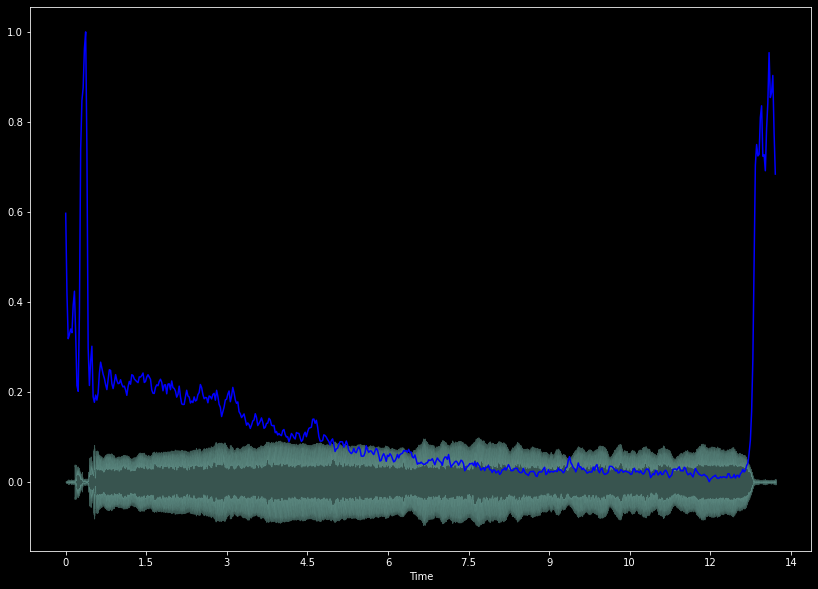

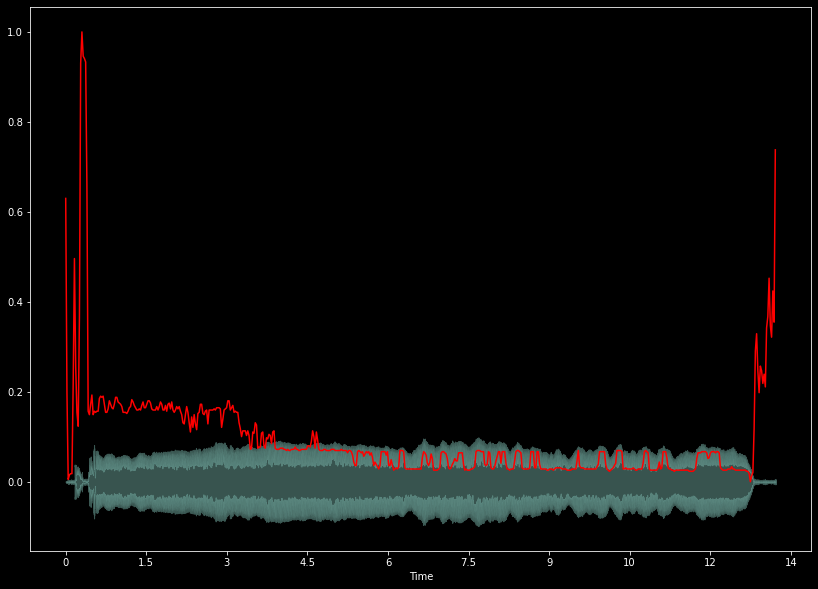

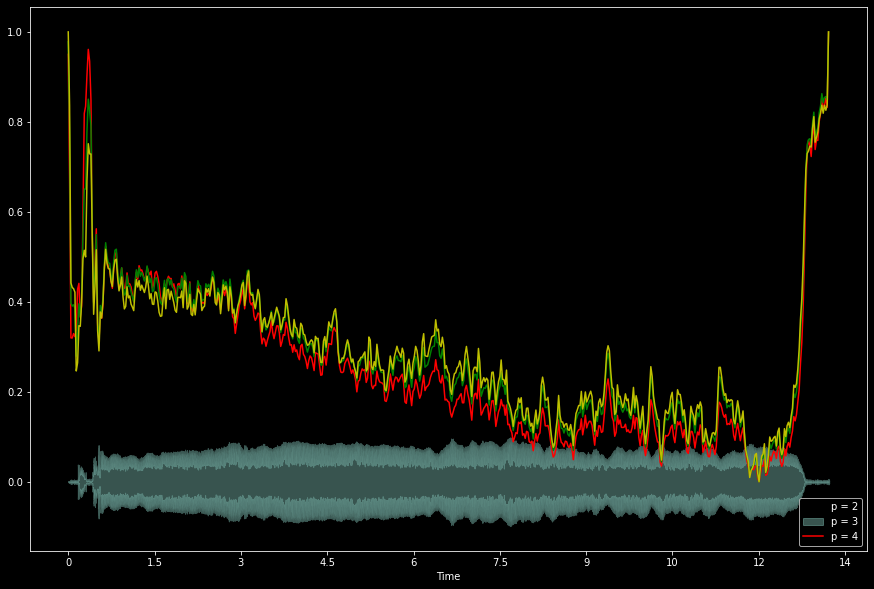

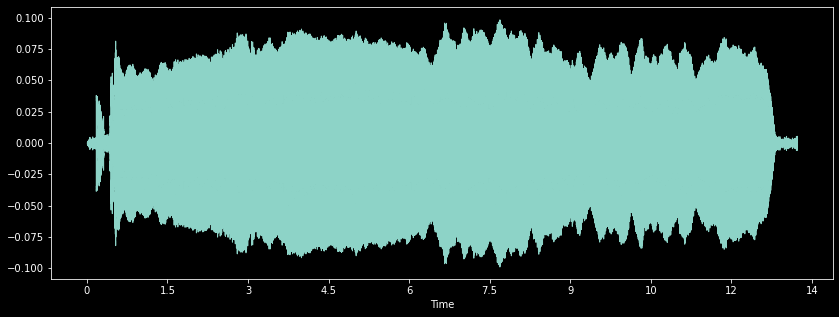

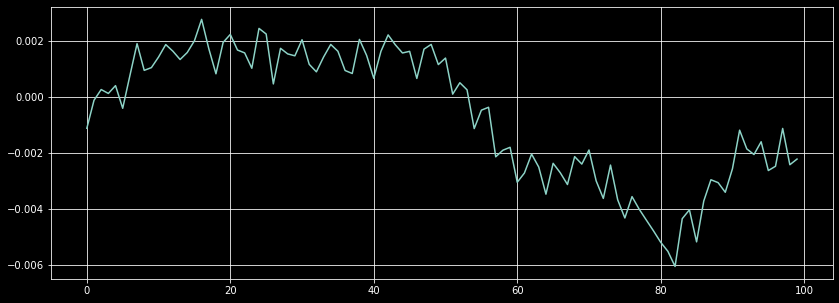

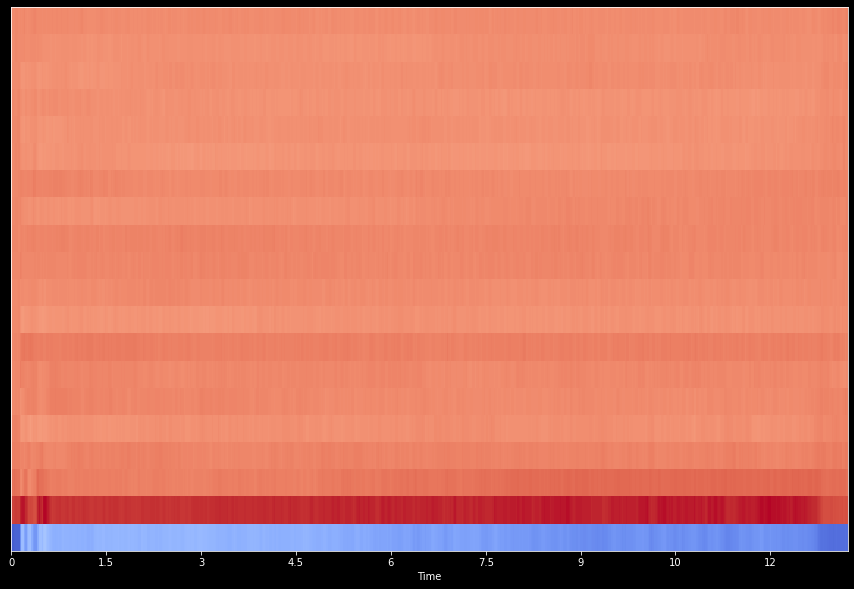

In [36]:
processFile("./010.wav")    

Loading the audio file 021.wav
<class 'numpy.ndarray'> <class 'int'>
(291600,) 22050
Spectrogram
Spectral Centroid


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/1754874564.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


Spectral Roll Off


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3094491030.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


Spectral Bandwidth


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:3: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:4: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

Zero Crossing Rate
MFCC
(20, 570)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/533505447.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


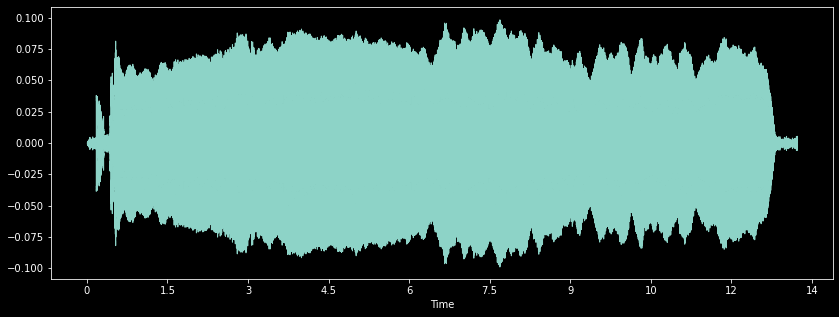

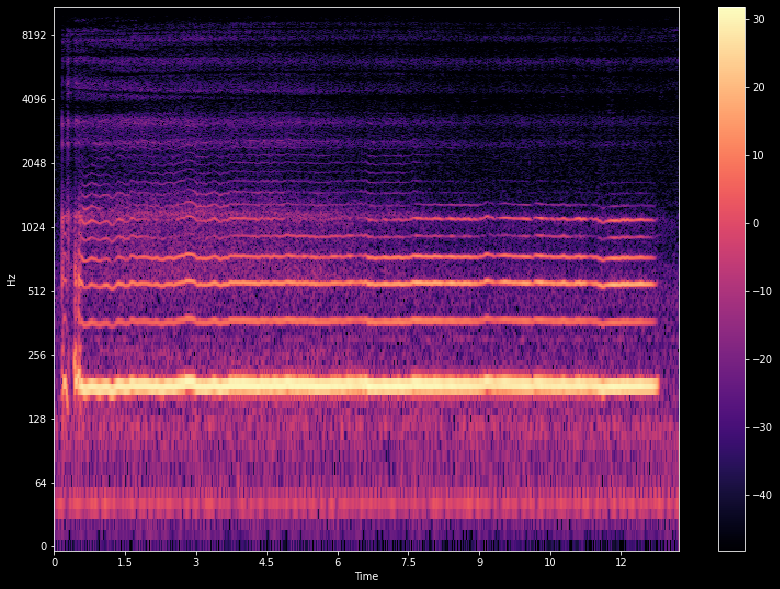

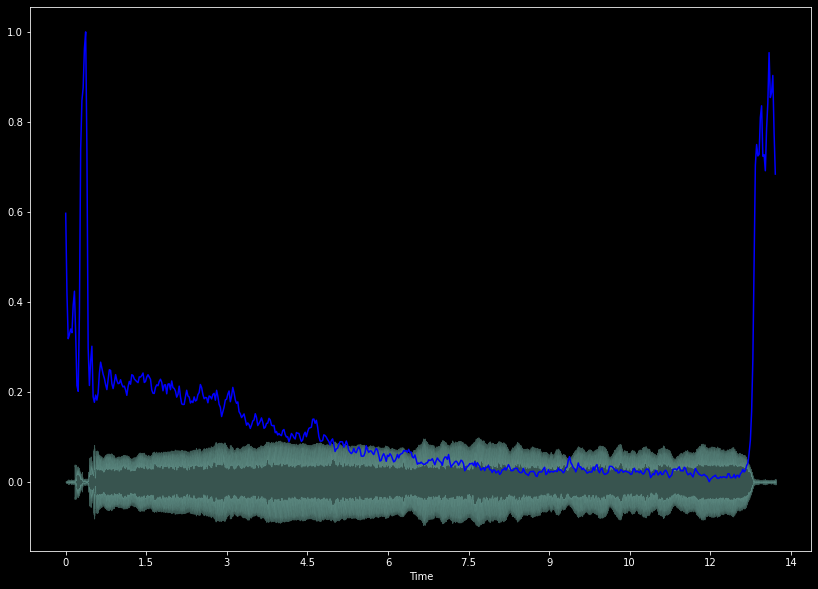

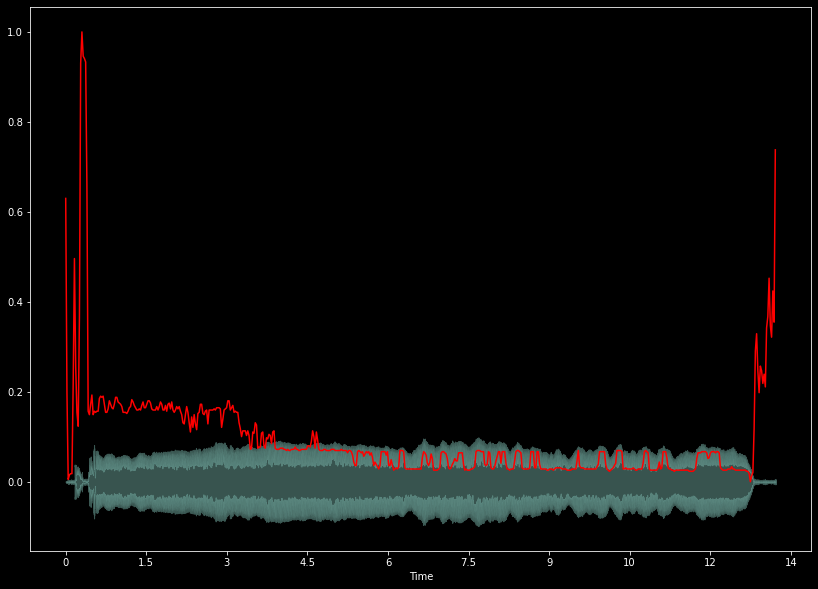

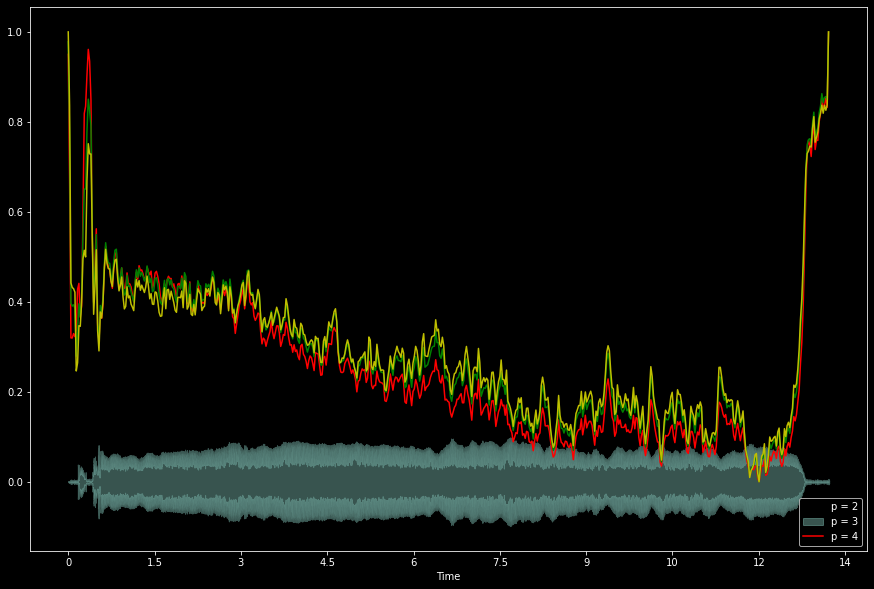

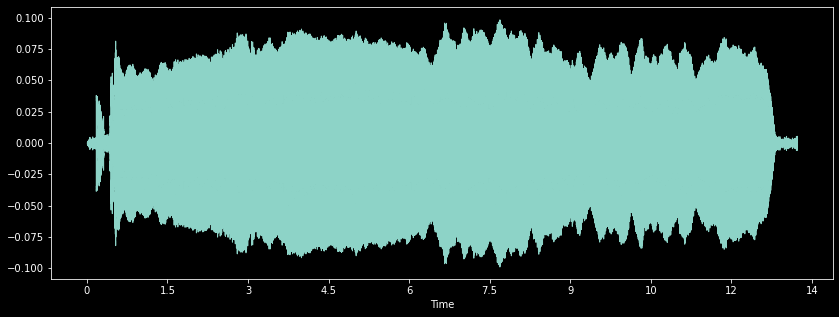

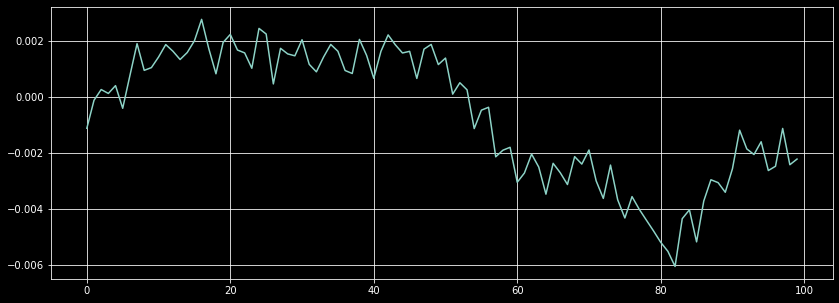

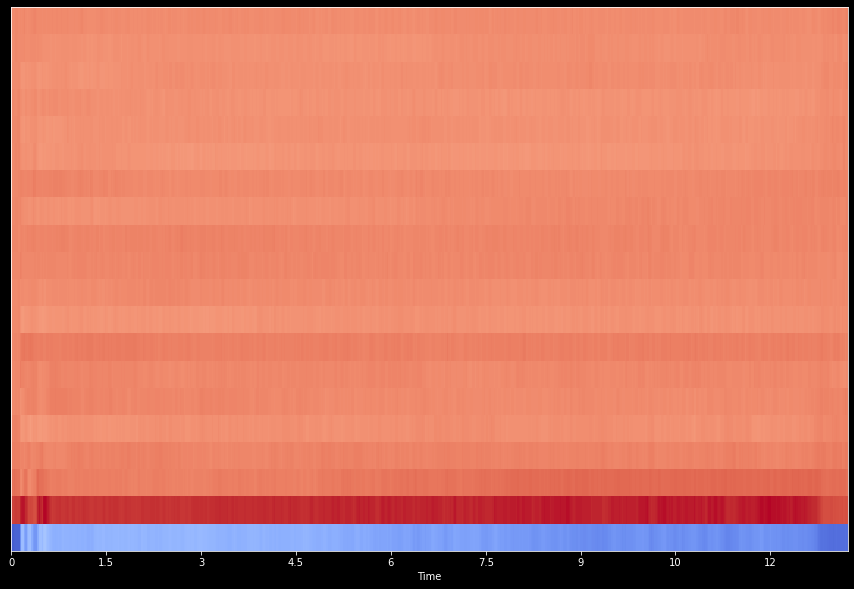

In [37]:
processFile("./012.wav")

Loading the audio file 021.wav
<class 'numpy.ndarray'> <class 'int'>
(291600,) 22050
Spectrogram
Spectral Centroid


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/1754874564.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


Spectral Roll Off


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3094491030.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


Spectral Bandwidth


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:3: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:4: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

Zero Crossing Rate
MFCC
(20, 570)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/533505447.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


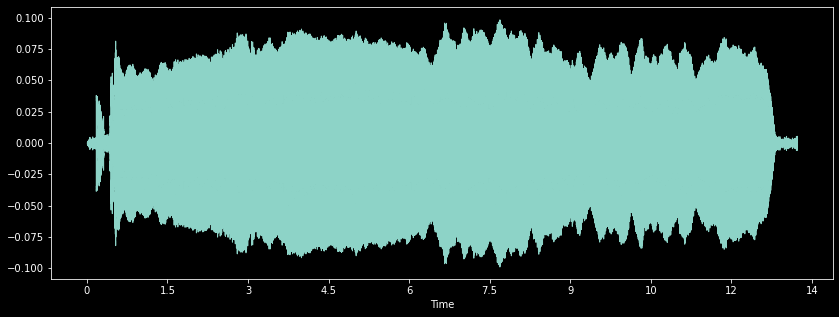

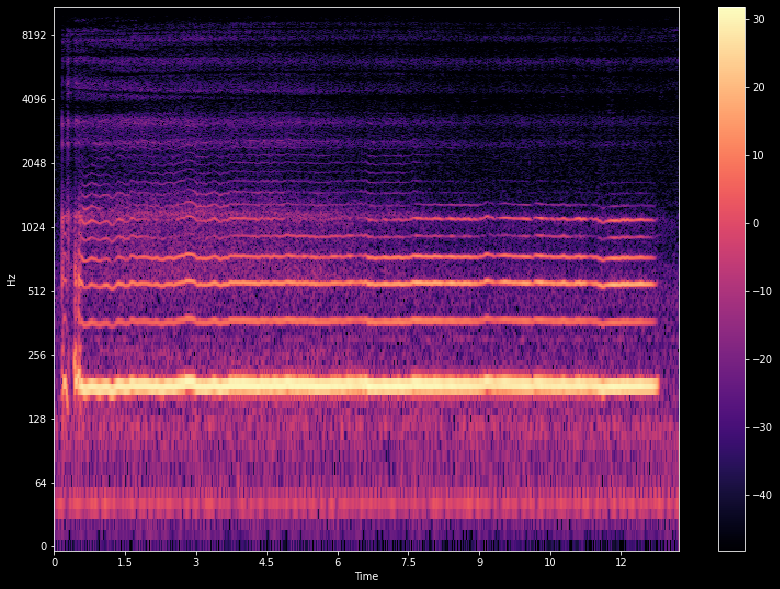

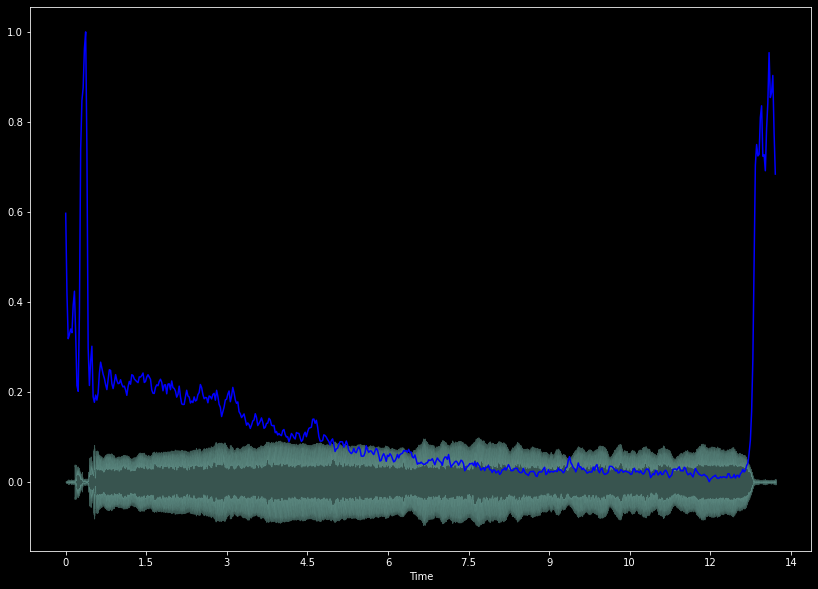

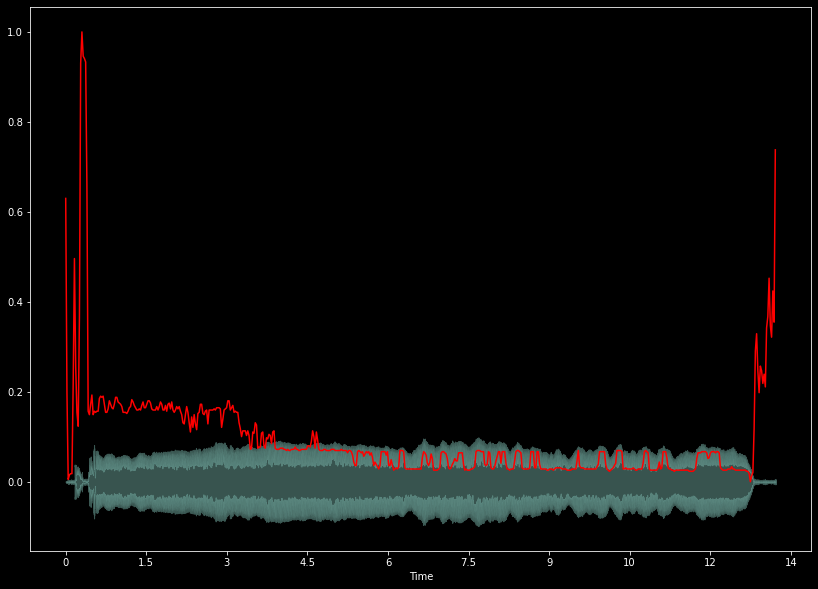

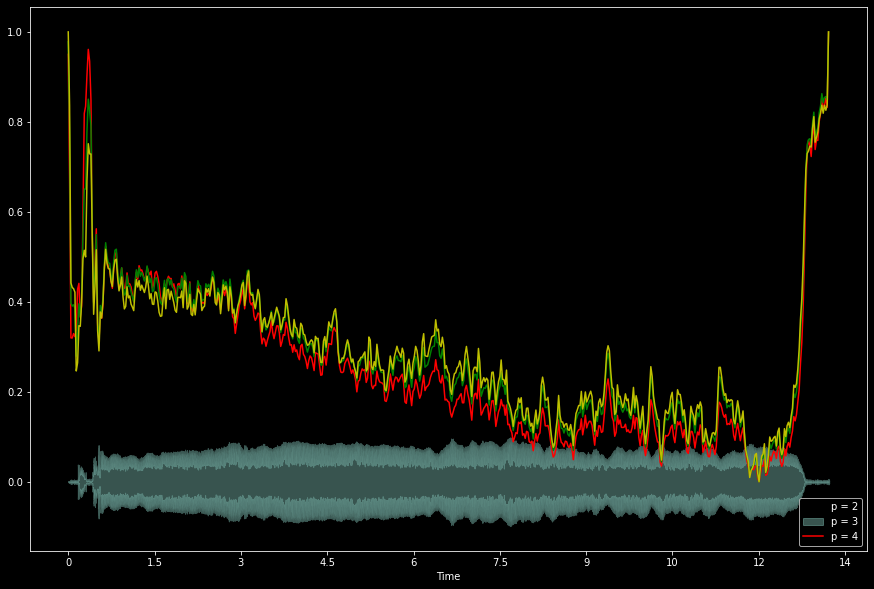

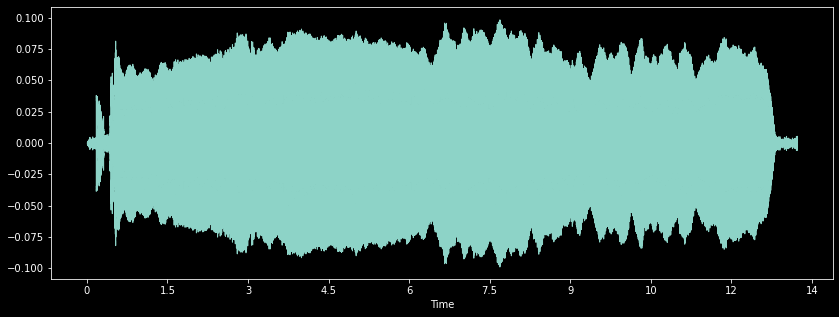

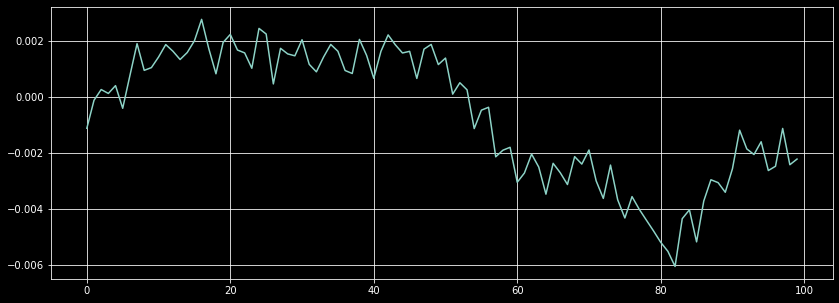

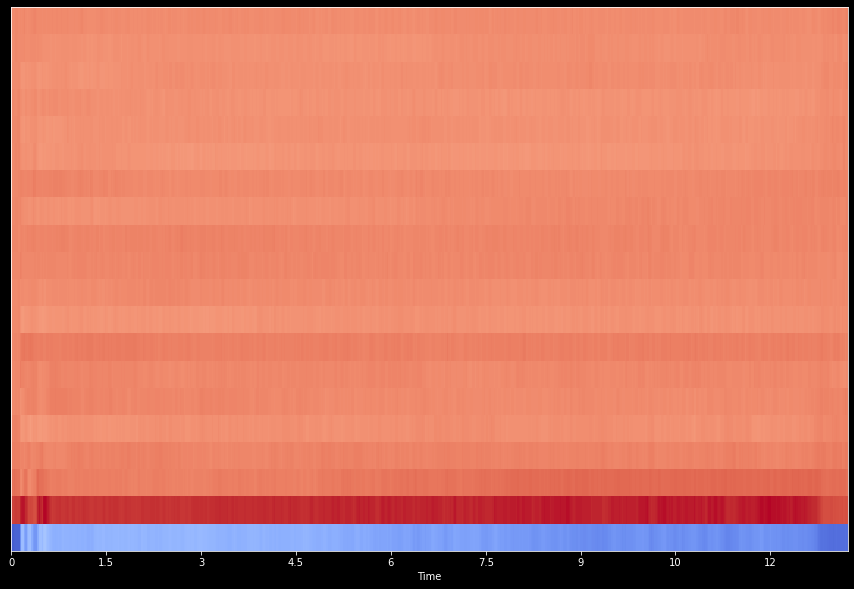

In [38]:
processFile("./015.wav")

Loading the audio file 021.wav
<class 'numpy.ndarray'> <class 'int'>
(291600,) 22050
Spectrogram
Spectral Centroid


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/1754874564.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


Spectral Roll Off


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3094491030.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


Spectral Bandwidth


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:2: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:3: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/3938102602.py:4: FutureWarning: Pass y=[0.0099138  0.00968819 0.00994132 ... 0.01283177 0.01262134 0.01325001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

Zero Crossing Rate
MFCC
(20, 570)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_27871/533505447.py:2: FutureWarning: Pass y=[-8.6197608e-05 -3.1180453e-04 -5.8684222e-05 ...  2.8317738e-03
  2.6213443e-03  3.2500059e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


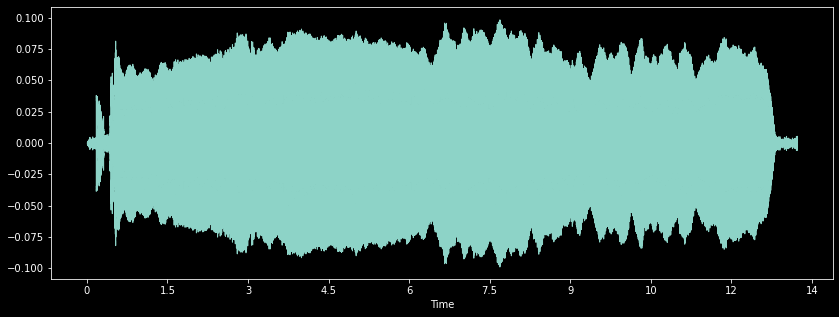

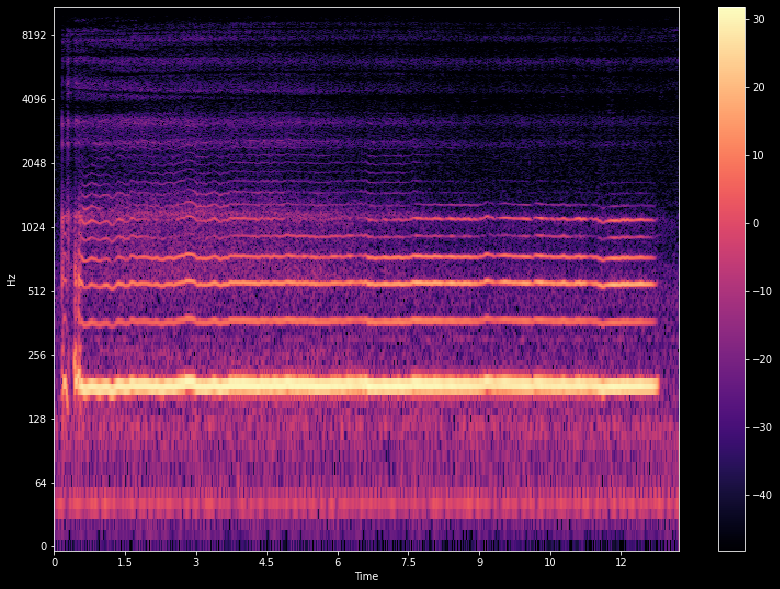

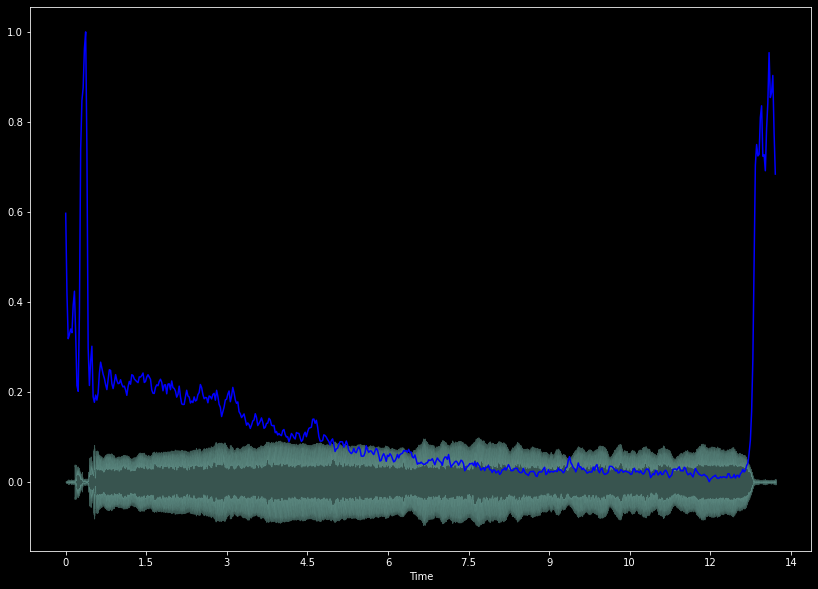

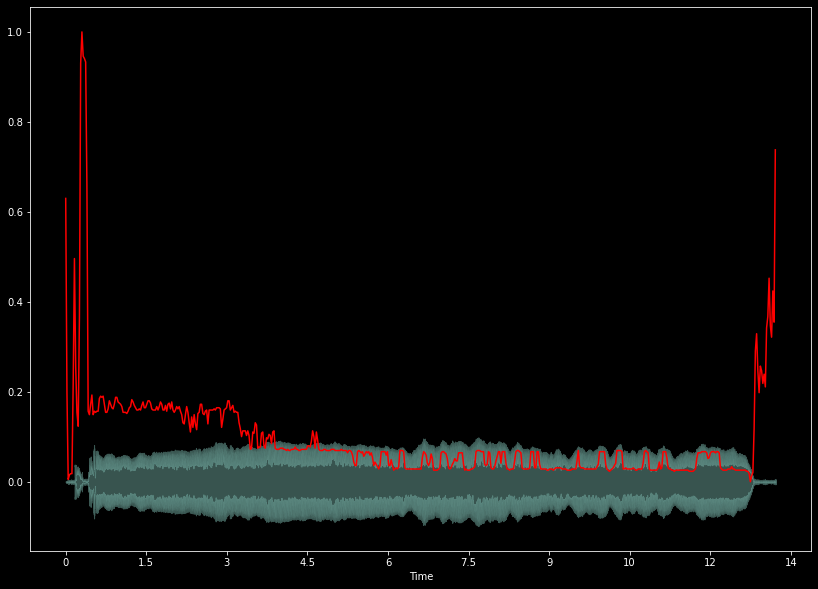

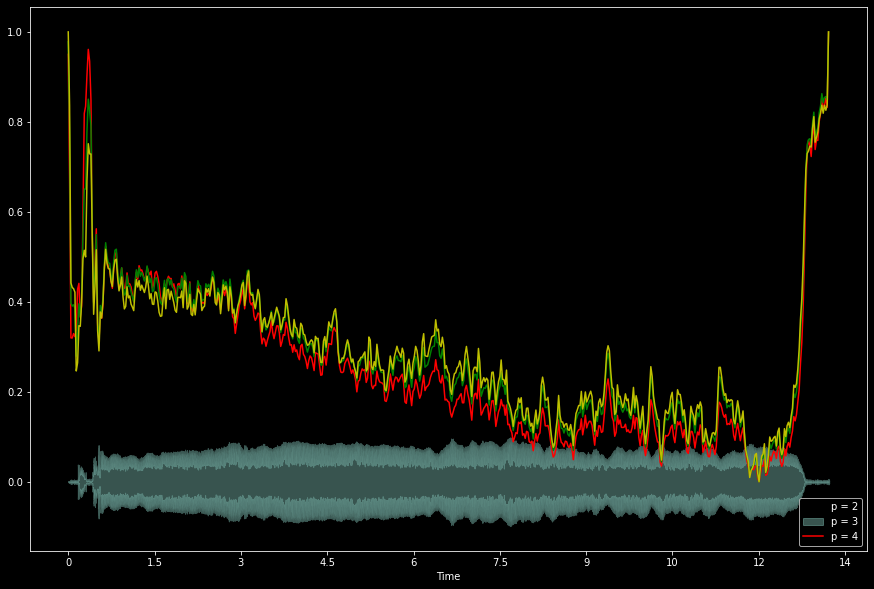

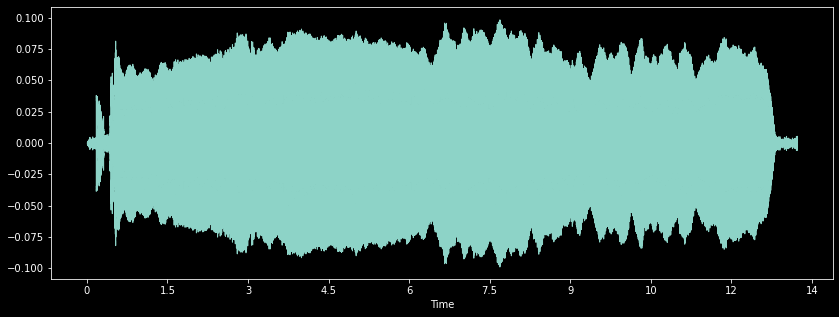

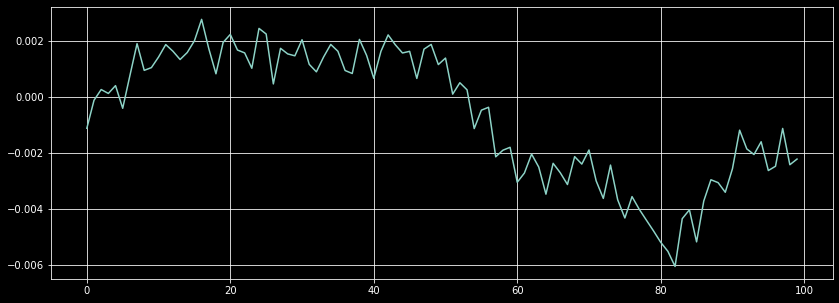

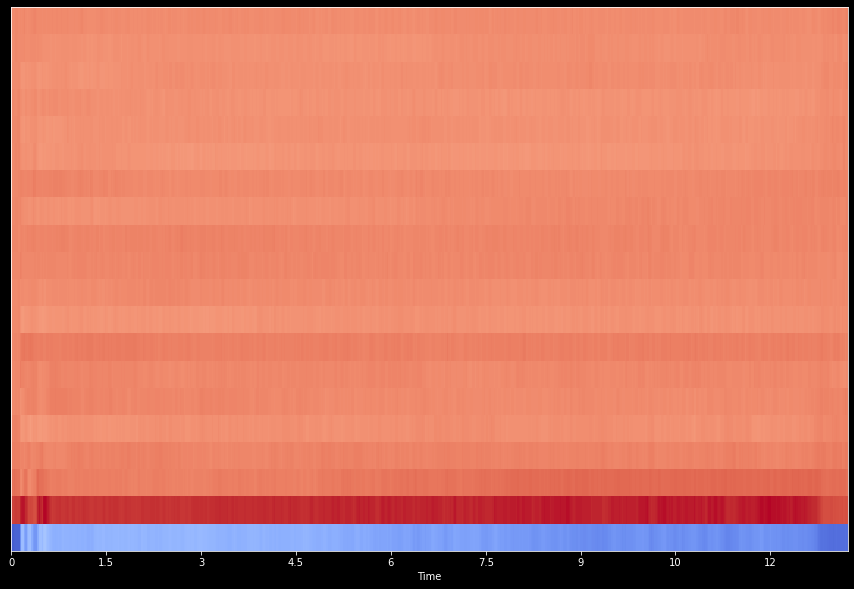

In [39]:
processFile("./021.wav")